In [1]:
import glob
import pandas as pd
import numpy as np
import os

In [2]:
fileloc = r"G:\My Drive\Tom-Tanvi\Shared With Bing,Tom and Tanvi\Video Analysis\DeepLabCut-ImageAnalysis\take5\outputFromDLC\VideoResults\EntireDataSet"

annotation_folder = r"G:\My Drive\Tom-Tanvi\Shared With Bing,Tom and Tanvi\Moth Annotations\CSV for Video Annotations"

In [3]:
filelist = glob.glob(fileloc + r"\*.h5")
# filelist
# filelist = glob.glob('../dataFolders/DLCtrackingResults/' + '*.h5')

In [4]:
annotation_filelist = glob.glob(annotation_folder + r"\*MothInOut.csv")
annotation_filelist

['G:\\My Drive\\Tom-Tanvi\\Shared With Bing,Tom and Tanvi\\Moth Annotations\\CSV for Video Annotations\\c-2_m4_MothInOut.csv',
 'G:\\My Drive\\Tom-Tanvi\\Shared With Bing,Tom and Tanvi\\Moth Annotations\\CSV for Video Annotations\\c-3_m11_MothInOut.csv',
 'G:\\My Drive\\Tom-Tanvi\\Shared With Bing,Tom and Tanvi\\Moth Annotations\\CSV for Video Annotations\\c-10_m13_MothInOut.csv',
 'G:\\My Drive\\Tom-Tanvi\\Shared With Bing,Tom and Tanvi\\Moth Annotations\\CSV for Video Annotations\\c-1_m4_MothInOut.csv',
 'G:\\My Drive\\Tom-Tanvi\\Shared With Bing,Tom and Tanvi\\Moth Annotations\\CSV for Video Annotations\\c-2_m11_MothInOut.csv',
 'G:\\My Drive\\Tom-Tanvi\\Shared With Bing,Tom and Tanvi\\Moth Annotations\\CSV for Video Annotations\\c-3_m3_MothInOut.csv',
 'G:\\My Drive\\Tom-Tanvi\\Shared With Bing,Tom and Tanvi\\Moth Annotations\\CSV for Video Annotations\\c-10_m15_MothInOut.csv',
 'G:\\My Drive\\Tom-Tanvi\\Shared With Bing,Tom and Tanvi\\Moth Annotations\\CSV for Video Annotations\\c

In [5]:
annotation = pd.read_csv(annotation_filelist[0]) 
annotation.head()

,Unnamed: 0,MothOut,FramesInView,MothIN,Annotations
0,0,26057,12033,14024,FI
1,1,26884,16,26868,NM
2,2,29863,2184,27679,FI
3,3,33297,1684,31613,FI
4,4,35886,1996,33890,FI


In [6]:
filename = os.path.basename(annotation_filelist[0])
filename[:-14]

'c-2_m4'

In [7]:
file_matched = [file for file in filelist if filename[:-14] in file]
file_matched

['G:\\My Drive\\Tom-Tanvi\\Shared With Bing,Tom and Tanvi\\Video Analysis\\DeepLabCut-ImageAnalysis\\take5\\outputFromDLC\\VideoResults\\EntireDataSet\\c-2_m4DeepCut_resnet50_mothFeedingJohn_v5Feb15shuffle1_1030000.h5']

In [8]:
temp = pd.read_hdf(file_matched[0])
DLC = temp.loc[slice(None),(slice(None),'proboscisTip')].copy()
DLC.head()

scorer    DeepCut_resnet50_mothFeedingJohn_v5Feb15shuffle1_1030000  \
bodyparts                                             proboscisTip   
coords                                                           x   
0                                                   0.445835         
1                                                 322.195326         
2                                                   0.445835         
3                                                   0.445835         
4                                                   0.445835         

scorer                            
bodyparts                         
coords              y likelihood  
0            0.722110   0.000002  
1          306.575773   0.000005  
2            0.722110   0.000002  
3            0.722110   0.000002  
4            0.722110   0.000002

In [9]:
# DLC.columns = DLC.columns.droplevel()
DLC.columns = DLC.columns.droplevel(level = [0,1])
DLC.head()

coords,x,y,likelihood
0,0.445835,0.722110,0.000002
1,322.195326,306.575773,0.000005
2,0.445835,0.722110,0.000002
3,0.445835,0.722110,0.000002
4,0.445835,0.722110,0.000002


In [10]:
# create new pandas series that will have all the annotation for each frame

label = pd.Series(index = DLC.index, name = 'label')

# run through annotation file each line -
for line in annotation.index:
    label.loc[annotation.loc[line, 'MothIN']: annotation.loc[line, 'MothOut']] = annotation.loc[line, 'Annotations']

label[label.isnull()] = 'NA'

DLC.loc[:,'label']=label

In [11]:
# convert all points within NaN zone (5,5) to NaN
DLC.loc[DLC['x']<5, 'x']=np.nan
DLC.loc[DLC['y']<5, 'y']=np.nan

In [12]:
DLC.head()

coords,x,y,likelihood,label
0,NaN,NaN,0.000002,NA
1,322.195326,306.575773,0.000005,NA
2,NaN,NaN,0.000002,NA
3,NaN,NaN,0.000002,NA
4,NaN,NaN,0.000002,NA


In [13]:
moth = pd.Series(index = DLC.index, name = 'mothID')
moth = filename[:-14]
DLC.loc[:,'mothID']=moth
DLC.head()

coords,x,y,likelihood,label,mothID
0,NaN,NaN,0.000002,NA,c-2_m4
1,322.195326,306.575773,0.000005,NA,c-2_m4
2,NaN,NaN,0.000002,NA,c-2_m4
3,NaN,NaN,0.000002,NA,c-2_m4
4,NaN,NaN,0.000002,NA,c-2_m4


In [14]:
# add frame number as a separate column

DLC.loc[:,'frameNum'] = DLC.index.values
DLC.head()

coords,x,y,likelihood,label,mothID,frameNum
0,NaN,NaN,0.000002,NA,c-2_m4,0
1,322.195326,306.575773,0.000005,NA,c-2_m4,1
2,NaN,NaN,0.000002,NA,c-2_m4,2
3,NaN,NaN,0.000002,NA,c-2_m4,3
4,NaN,NaN,0.000002,NA,c-2_m4,4


In [15]:
# pull out location and probabiltiy and plot them against each other - 2D or 3D plot, color them with the John's manual annotation

import matplotlib.pyplot as plt

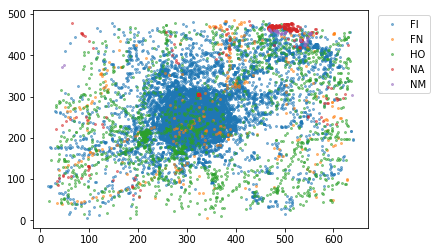

In [18]:
groups = DLC.groupby('label')
# i = 0
# fig, ax = plt.subplots(3,2)
# ax = ax.ravel()
for name, group in groups:
    plt.plot(group.loc[group.likelihood > 0.5, 'x'], group.loc[group.likelihood > 0.5 , 'y'], marker='o', linestyle = '' , markersize=2, label = name, alpha = 0.5)
#     i+=1
plt.legend(bbox_to_anchor=(1.2, 1))
plt.show()

In [19]:
filtered = DLC[DLC.label != "NA"]
new_groups = filtered.groupby('label')

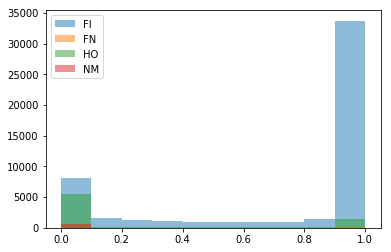

In [20]:
for name, group in new_groups:
    plt.hist(group.likelihood, label = name, alpha = 0.5, bins = 10)
plt.legend()

In [21]:
# filtered[(filtered.label == 'NM') & (filtered.likelihood > 0.5)]

In [22]:
# annotation[annotation.Annotations == 'NM']

In [29]:
for f in annotation_filelist:
    annotation = pd.read_csv(f)
    filename = os.path.basename(f)
    file_matched = [file for file in filelist if filename[:-14] in file]
    
    temp = pd.read_hdf(file_matched[0])
    DLC = temp.loc[slice(None),(slice(None),'proboscisTip')].copy()
    DLC.columns = DLC.columns.droplevel(level = [0,1])

    mean_col = []
    max_col = []
    min_col = []
    median_col = []
    
    for row in annotation.iterrows():
        data = row[1]

        In = data.MothIN
        out = data.MothOut

        mu = DLC.loc[In:out, 'likelihood'].mean(skipna = True)
        mx = DLC.loc[In:out, 'likelihood'].max()
        mn = DLC.loc[In:out, 'likelihood'].min()
        med = DLC.loc[In:out, 'likelihood'].median()

        mean_col.append(mu)
        max_col.append(mx)
        min_col.append(mn)
        median_col.append(med)

    annotation['mean'] = mean_col
    annotation['max'] = max_col
    annotation['min'] = min_col
    annotation['median'] = median_col

    annotation.to_csv('../dataFolders/DLCtrackingResults/' + filename[:-14] + '_AnnotationWithTrackingStats.csv')

In [19]:
import matplotlib.pyplot as plt

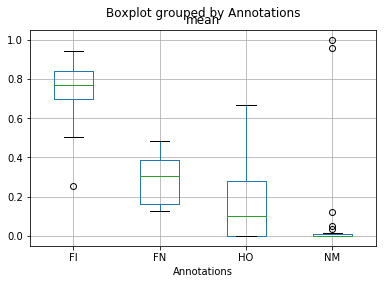

In [20]:
annotation.boxplot(column=['mean'], by='Annotations')
plt.show()

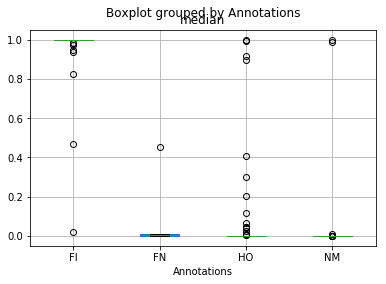

In [21]:
annotation.boxplot(column=['median'], by='Annotations')

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f81a6bdac8>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f81a68e860>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f81a6c9710>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f81a6c9a20>}

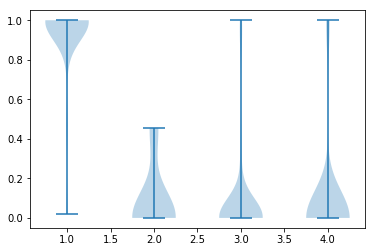

In [22]:
fig, axes = plt.subplots()

axes.violinplot(dataset = [annotation[annotation.Annotations == 'FI']["median"].values,
                           annotation[annotation.Annotations == 'FN']["median"].values,
                           annotation[annotation.Annotations == 'HO']["median"].values,
                           annotation[annotation.Annotations == 'NM']["median"].values])

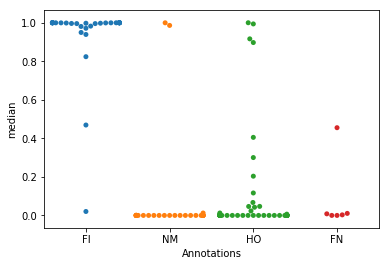

In [23]:
import seaborn as sns

ax = sns.swarmplot(x="Annotations", y="median", data=annotation)